In [66]:
%matplotlib inline
import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn


def poly_approx(x, coefficients): 
    return sum([coefficient * x ** (len(coefficients) - 1 - i) for i, coefficient in enumerate(coefficients)])

    
def compute_coefficients_ReLU(n_coefficients, domain=(-100, 100)):
    assert domain[0] < 0 and domain[1] > 0
    x = range(domain[0], domain[1])
    y = [0] * abs(domain[0]) + range(0, domain[1])
    return np.polyfit(x, y, n_coefficients), x, y


def plot_ReLU(coefficients, x, y):
    ReLU = np.poly1d(coefficients)
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = ReLU(x_new)

    pylab.rcParams['figure.figsize'] = (15, 10)
    plt.plot(x,y, x_new, y_new)
    pylab.title('Coefficients: {}'.format(len(coefficients)-1))
    ax = plt.gca()
    fig = plt.gcf()


coefficients, x, y = compute_coefficients_ReLU(9, (-300, 300))
print coefficients
print poly_approx(10, coefficients)

[ -6.26908926e-22  -7.63713651e-18   1.06893581e-16   1.58466380e-12
  -5.94142031e-12  -1.18830167e-07   1.18816303e-07   4.93518136e-03
   4.99383132e-01   1.00921468e+01]
15.5784277195


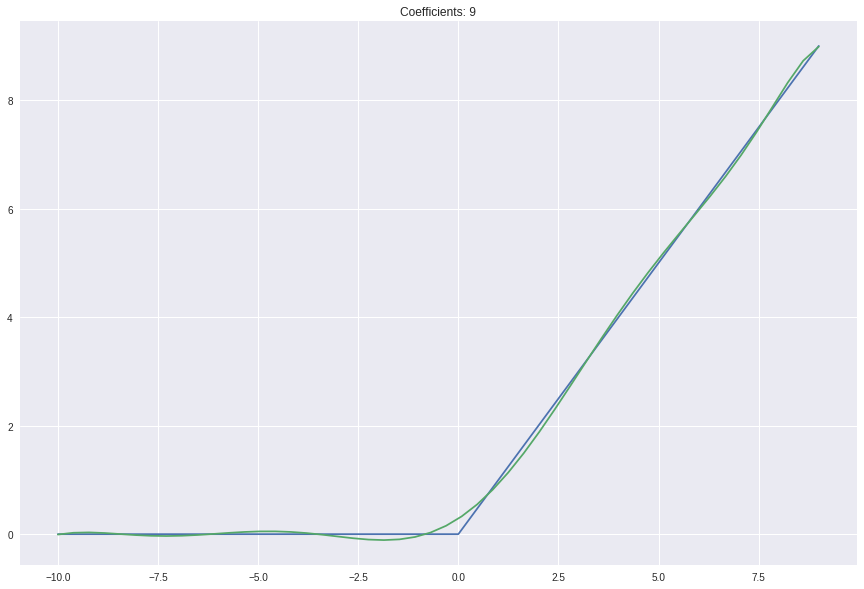

In [67]:
coefficients, x, y = compute_coefficients_ReLU(9, (-10, 10))   
plot_ReLU(coefficients, x, y)

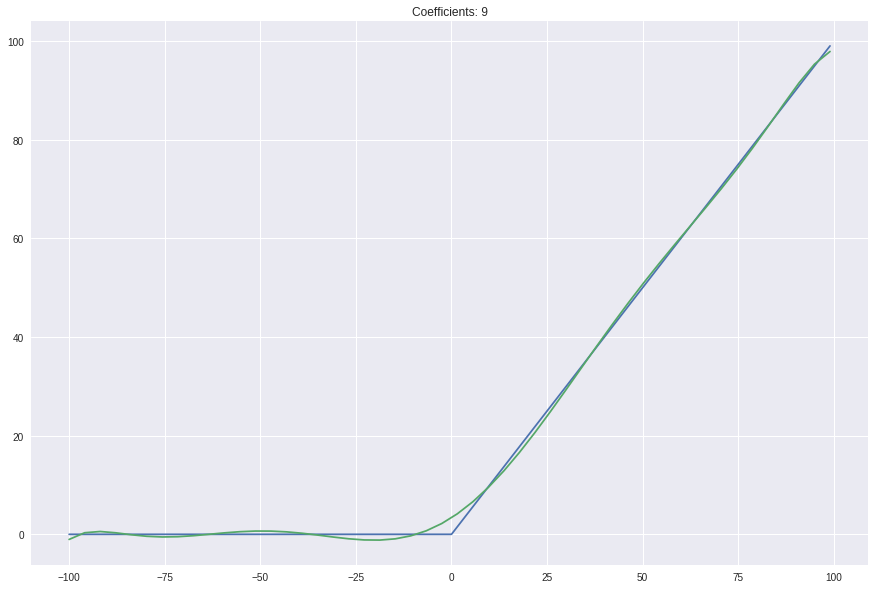

In [59]:
coefficients, x, y = compute_coefficients_ReLU(9, (-100, 100))   
plot_ReLU(coefficients, x, y)

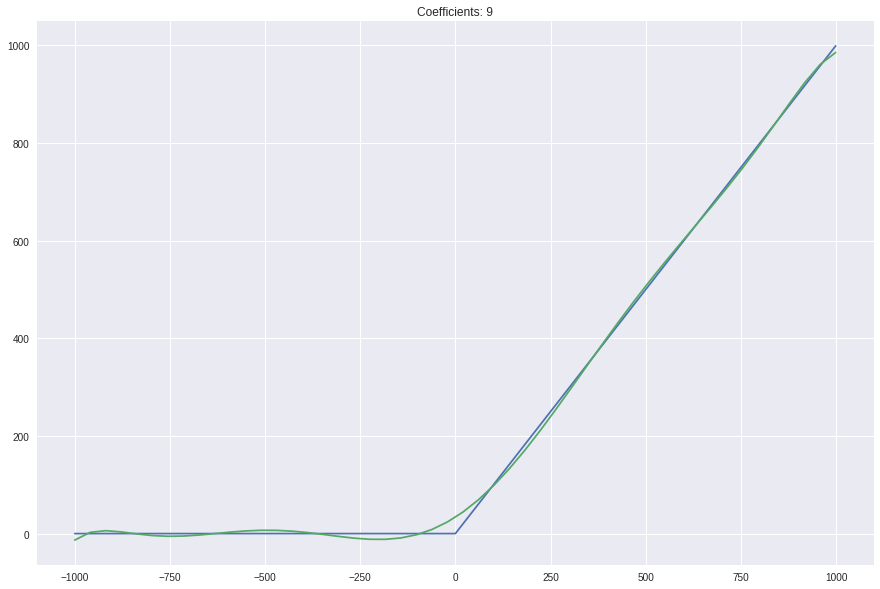

In [60]:
coefficients, x, y = compute_coefficients_ReLU(9, (-1000, 1000))   
plot_ReLU(coefficients, x, y)